In [4]:
from zipfile import ZipFile
file = "/content/drive/My Drive/Colab Notebooks/utkface-new (1).zip"
with ZipFile(file,'r') as zip:
  zip.extractall()
  print('done')

done


In [0]:
import os
from imageio import imread
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
from keras.optimizers import *
from keras.utils.np_utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.losses import *

In [6]:
os.chdir("UTKFace")


file = os.listdir()
label = [i.split("_")[-2] for i in file]


race= []

for i in  label:
    i = int(i)
    race.append(i)

print(len(race))

label1 = [i.split('_')[1] for i in file]
gender = []
for i in label1:
    i = int(i)
    gender.append(i)
print(len(gender))

label2 =[i.split('_')[0] for i in file]
print(len(label2))
age=[]
for i in label2:
    i=int(i)
    if i<=14:
        i=0
        age.append(i)
    if i<=18 and i>14:
        i=1
        age.append(i)
    if  i<=25 and i>18:
        i=2
        age.append(i)

    if i<=50 and i>25:
        i=3
        age.append(i)

    if i<=116 and i>50:
        i=4
        age.append(i)

print(len(age))


      
X_data =[]
for file in file:
    face = imread(file)
    face = cv2.resize(face, (150, 150))
    X_data.append(face)
x1=np.array(X_data)
print(x1.shape)
x = np.squeeze(X_data)
x = x.astype('float32')
x /= 255

print(x.shape)





(x_train1, y_train1), (x_test1, y_test1) = (x[:15008],age[:15008]) , (x[15008:] ,age[15008:])
(x_valid1 , y_valid1) = (x_train1[:7000], y_train1[:7000])




(x_train2, y_train2), (x_test2, y_test2) = (x[:15008],gender[:15008]) , (x[15008:] ,gender[15008:])
(x_valid2 , y_valid2) = (x_train2[:7000], y_train2[:7000])




(x_train3, y_train3), (x_test3, y_test3) = (x[:15008],race[:15008]) , (x[15008:] ,race[15008:])
(x_valid3 , y_valid3) = (x_train3[:7000], y_train3[:7000])#

23708
23708
23708
23708
(23708, 150, 150, 3)
(23708, 150, 150, 3)


In [7]:
model1 =Sequential()
model1.add(Conv2D(16,(4,4),  activation='relu', input_shape=(150,150,3)))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(32,(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(32, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=1))
model1.add(Flatten())
model1.add(Dense(5, activation='softmax'))


model1.summary()
model1.compile(loss='sparse_categorical_crossentropy',optimizer=rmsprop(learning_rate=0.001),metrics=['accuracy'])
history1= model1.fit(x_train1,y_train1,validation_data=(x_valid1,y_valid1),epochs=20,batch_size=350)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 147, 147, 16)      784       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 33, 33, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 34848)            

In [10]:
model2 =Sequential()
model2.add(Conv2D(16,(4,4),  activation='relu', input_shape=(150,150,3)))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(32,(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=1))
model2.add(Conv2D(32, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=1))
model2.add(Flatten())
model2.add(Dense(2, activation='softmax'))


model2.summary()
model2.compile(loss='sparse_categorical_crossentropy',optimizer=rmsprop(learning_rate=0.001),metrics=['accuracy'])
history2= model2.fit(x_train2,y_train2,validation_data=(x_valid2,y_valid2),epochs=20,batch_size=500)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 147, 147, 16)      784       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 33, 33, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 33, 33, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 31, 31, 32)       

In [12]:
model3 =Sequential()
model3.add(Conv2D(16,(4,4),  activation='relu', input_shape=(150,150,3)))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Conv2D(32,(3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Conv2D(32, (3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size=1))
model3.add(Flatten())
model3.add(Dense(5, activation='softmax'))

model3.summary()
model3.compile(loss='sparse_categorical_crossentropy',optimizer=rmsprop(learning_rate=0.001),metrics=['accuracy'])
history3= model3.fit(x_train3,y_train3,validation_data=(x_valid3,y_valid3),epochs=20,batch_size=350)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 147, 147, 16)      784       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 71, 71, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 33, 33, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 33, 33, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 34848)            

In [9]:
score1 = model1.evaluate(x_test1, y_test1, verbose=0)
print(score1)


[0.8235066941962845, 0.6804597973823547]


In [11]:

score2 = model2.evaluate(x_test2, y_test2, verbose=0)
print(score2)


[0.3648021682514541, 0.8580459952354431]


In [13]:

score3 = model3.evaluate(x_test3, y_test3, verbose=0)
print(score3)


[0.8875165323553414, 0.768850564956665]


MessageError: ignored

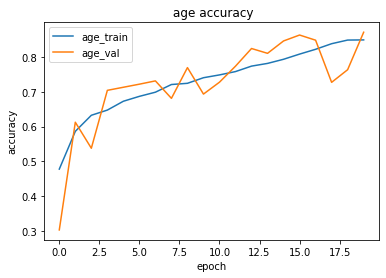

In [27]:
from google.colab import files
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title(' age accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['age_train', 'age_val'], loc='upper left')
plt.savefig("agen+.png")
files.download("agen+.png")
plt.show()

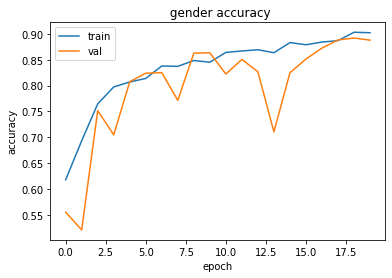

In [28]:
from google.colab import files
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title(' gender accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("gendern.png")
files.download("gendern.png")
plt.show()

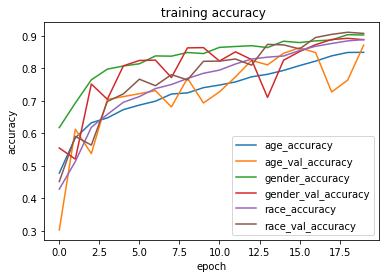

In [44]:
plt.plot(history1.history['accuracy'],label="age_accuracy")
plt.plot(history1.history['val_accuracy'],label='age_val_accuracy')
plt.plot(history2.history['accuracy'],label="gender_accuracy")
plt.plot(history2.history['val_accuracy'],label='gender_val_accuracy')
plt.plot(history3.history['accuracy'],label="race_accuracy")
plt.plot(history3.history['val_accuracy'],label="race_val_accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title(' training accuracy')
plt.legend()
plt.savefig("racen.png")
files.download("racen.png")
plt.show()

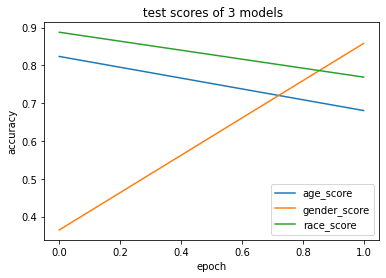

In [40]:
plt.plot(score1,label= 'age_score')
plt.plot(score2,label='gender_score')
plt.plot(score3,label='race_score')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title(' test scores of 3 models')
plt.savefig("evaluate.png")
files.download("evaluate.png")
plt.show()


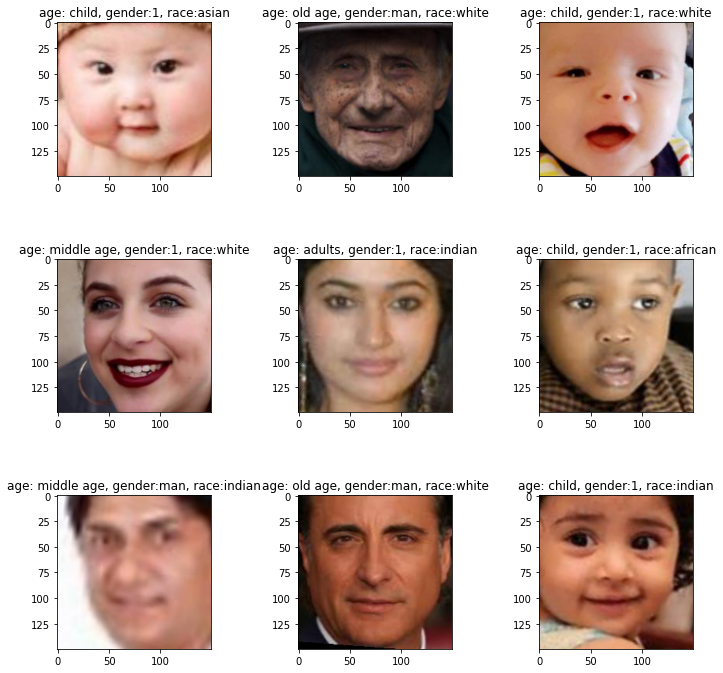

In [47]:
from google.colab import files
from numpy import random
predictions1 = model1.predict_classes(x_test1)
predictions2 = model2.predict_classes(x_test1)
predictions3 = model3.predict_classes(x_test1)

random_indices = [random.randint(0, 1000) for i in range(9)]


plt.figure(figsize=(10,10))
for i, index in enumerate(random_indices):
    pred1 = predictions1[index]
    if pred1 == 0:
      pred1 = "child"
    if pred1==1:
      pred1= "teen age"
    if pred1==2:
      pred1="adults"
    if pred1==3:
      pred1="middle age" 
    if pred1==4:
       pred1 = "old age" 
    pred2 = predictions2[index]   
    if pred2==0:
      pred2="man"
    if pred2==0:
      pred2="women"
    pred3 = predictions3[index]
    if pred3 == 0:
      pred3 = "white"
    if pred3==1:
      pred3= "african"
    if pred3==2:
      pred3="asian"
    if pred3==3:
      pred3="indian" 
    if pred3==4:
       pred3 = "others" 

    k=plt.subplot(3,3,i+1)
    k.imshow(np.squeeze(x_test1[index]))
    plt.title(f"age: {pred1}, gender:{pred2}, race:{pred3}")
plt.tight_layout()
plt.savefig("age-gender-race.png")
files.download("age-gender-race.png")
plt.show()
